## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import sklearn.datasets as dta
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combine_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combine_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

sum_stats = pd.DataFrame(combine_data_df.groupby('Drug Regimen').count())
                         
sum_stats.head()
sum_stats['Mean'] = pd.DataFrame(combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
sum_stats['Median'] = pd.DataFrame(combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
sum_stats['Standard Deviation'] = pd.DataFrame(combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
sum_stats['Variance'] = pd.DataFrame(combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
sum_stats['SEM'] = pd.DataFrame(combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
sum_stats = sum_stats[['Mouse ID','Mean','Median', 'Standard Deviation', 'Variance', 'SEM']]
sum_stats = sum_stats.rename(columns= {'Mouse ID': 'Trials Count'})
sum_stats

,Trials Count,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,161,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar plots

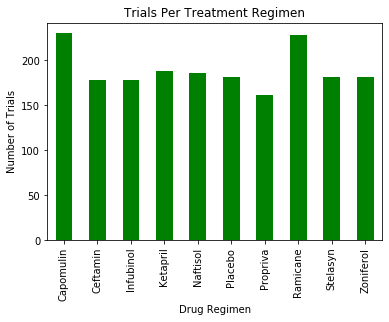

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapoints = sum_stats[['Trials Count']]

datapoints.plot(kind="bar", figsize=(6,4), color = "g", legend=False )
plt.title("Trials Per Treatment Regimen")
plt.ylabel('Number of Trials')
plt.show()

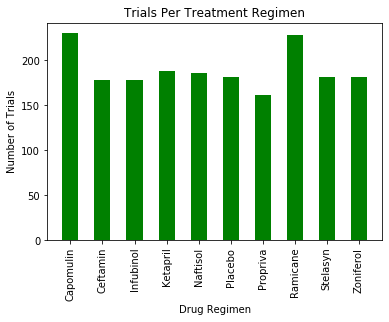

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, datapoints['Trials Count'], color='g', width=0.5, align='center')
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")
plt.title('Trials Per Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Trials')
plt.show()

## Pie plots

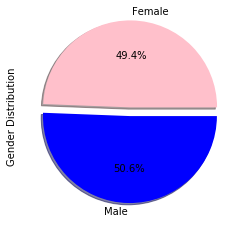

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = combine_data_df.groupby(['Sex'])
gender_count = gender_df['Sex'].count()
explode = (0.1,0)
colors = ["pink", "blue"]
gender_count.plot(kind ="pie", title = False, autopct = "%1.1f%%", 
               explode = explode, shadow = True, subplots=True, colors=colors)
# Label y-axis
plt.ylabel("Gender Distribution")
# Show pandas pie plot
plt.show()

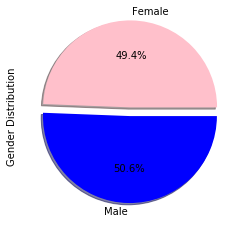

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
colors = ["pink", "blue"]
explode = (0.1, 0)
gender = combine_data_df.groupby('Sex').count()
plt.pie(gender["Mouse ID"], explode=explode, labels=labels, 
        colors=colors, shadow=True, autopct='%1.1f%%')
plt.ylabel('Gender Distribution')
plt.show()

In [ ]:
gender

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Capomulin, Ramicane, Infubinol, and Ceftamin.

top4_df = combine_data_df.loc[(combine_data_df["Drug Regimen"] == "Capomulin") |
                              (combine_data_df["Drug Regimen"] == "Ramicane") | 
                              (combine_data_df["Drug Regimen"] == "Infubinol") |
                              (combine_data_df["Drug Regimen"] == "Ceftamin") ]

top4_df = top4_df.sort_values("Timepoint", ascending=False)
top4_df = top4_df.drop_duplicates(subset="Mouse ID", keep='first')
top4_df.head()






,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1


In [8]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = top4_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outliers_df = combine_data_df.loc[(combine_data_df['Tumor Volume (mm3)'] > upper_bound) | 
                              (combine_data_df['Tumor Volume (mm3)'] < lower_bound)]
outliers_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


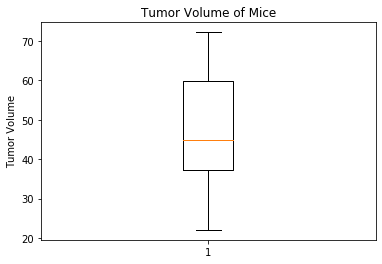

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_tv_df = top4_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(final_tv_df)
plt.show()


## Line and scatter plots

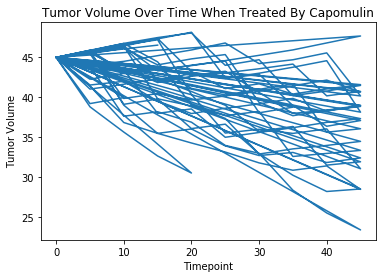

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = combine_data_df.loc[(combine_data_df["Drug Regimen"] == "Capomulin"),:]
timepoint = capomulin_df["Timepoint"]
tumor_volume = capomulin_df["Tumor Volume (mm3)"]
tumor_volume_line = plt.plot(timepoint, tumor_volume)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume Over Time When Treated By Capomulin')
plt.show()

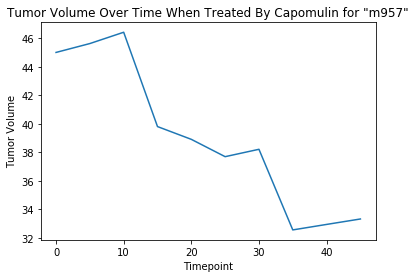

In [11]:
capomulin_df = combine_data_df.loc[(combine_data_df["Drug Regimen"] == "Capomulin"),:]
mouse_m957 = capomulin_df.loc[(combine_data_df["Mouse ID"] == "m957"),:]
timepoint = mouse_m957["Timepoint"]
tumor_volume = mouse_m957["Tumor Volume (mm3)"]
tumor_volume_line = plt.plot(timepoint, tumor_volume)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume Over Time When Treated By Capomulin for "m957"')
plt.show()


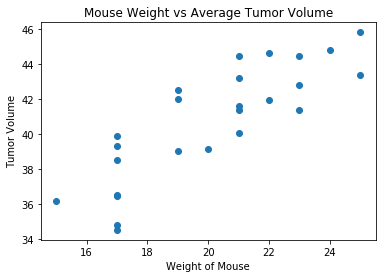

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = combine_data_df.loc[(combine_data_df["Drug Regimen"] == "Capomulin"),:]
mouse_weight = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
avg_tumor_volume = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight,avg_tumor_volume)
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()


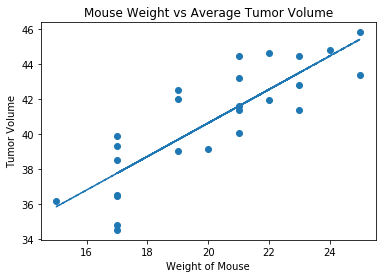

The correlation between weight and tumor volume is 0.84


In [13]:
# Calculate the correlation coefficient and linear regression model for 
# mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = combine_data_df.loc[(combine_data_df["Drug Regimen"] == "Capomulin"),:]
tp_df = capomulin_df["Timepoint"]
tv_df = capomulin_df["Tumor Volume (mm3)"]
slope, intercept, r, p, std_err = st.linregress(mouse_weight, avg_tumor_volume)
fit = slope * mouse_weight + intercept
plt.scatter(mouse_weight,avg_tumor_volume)
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight, fit,"--")

plt.show()
corr = round(st.pearsonr(mouse_weight,avg_tumor_volume)[0],2)
print(f'The correlation between weight and tumor volume is {corr}')